Import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import loguniform


import both train data and test data 
tfidf dataset are already 

In [7]:
raw_train_data = pd.read_csv('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\raw-data\\train.csv')
raw_test_data = pd.read_csv('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\raw-data\\test.csv')
raw_valid_data = pd.read_csv('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\raw-data\\valid.csv')
tfidf_train_data = np.load('C:\\Users\\xu741\Desktop\\IML\\a1\\a3\\tfidf-data\\train-tfidf.npy')
tfidf_test_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\tfidf-data\\test-tfidf.npy')
tfidf_valid_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\tfidf-data\\valid-tfidf.npy')
embedding_train_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\embeddings-data\\train-embeddings.npy')
embedding_test_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\embeddings-data\\test-embeddings.npy')
embedding_valid_data = np.load('C:\\Users\\xu741\\Desktop\\IML\\a1\\a3\\embeddings-data\\valid-embeddings.npy')



pre data processing 

In [8]:
# # repalce nan with mean value 
# raw_train_data.fillna(raw_train_data.mean(),inplace=True)

# # convert requirements and role column into bag-of-words representation 
# raw_train_data['requirements_and_role'].fillna('', inplace=True)

# sepearte labeled data and unlableled
labeled_tfidf_train_data, unlabeled_tfidf_train_data = tfidf_train_data[:8000], tfidf_train_data[-5902:]
labeled_embedding_train_data, unlabeled_embedding_train_data = embedding_train_data[:8000], embedding_train_data[-5902:]

# get Target labels for train data 
labeled_train_data_y, unlabeled_train_data_y = raw_train_data['mean_salary'].iloc[:8000], raw_train_data['mean_salary'].iloc[-5902:]
X_valid_raw, y_valid=raw_valid_data['requirements_and_role'], raw_valid_data['mean_salary']



Train data
and use Mean squared error to evaluate the model. 
Mean squared error calcualtes the average of the squared differences between the predicted and actual value. It measures how far the predicted values are from the actual values. The smaller the MSE, the better the model performs.

In [9]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()

kf = KFold(n_splits=5)

# train data using tfidf dataset 
X_train_tfidf, y_train_tfidf = labeled_tfidf_train_data, labeled_train_data_y
X_test_tfidf = tfidf_test_data
X_valid_tfidf = tfidf_valid_data

scores_lr_tfidf, scores_dt_tfidf, scores_knn_tfidf, scores_rf_tfidf = [],[],[],[]
r2_scores_lr_tfidf, r2_scores_dt_tfidf, r2_scores_knn_tfidf, r2_scores_rf_tfidf = [],[],[],[]
for i, (train_index, test_index) in enumerate(kf.split(X_train_tfidf)):

    X_train, X_test = X_train_tfidf[train_index], X_train_tfidf[test_index]
    y_train, y_test = y_train_tfidf[train_index], y_train_tfidf[test_index]

    lr.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    rf.fit(X_train,y_train)

    y_pred_lr = lr.predict(X_test)
    y_pred_dt = dt.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    mse_lr = mean_squared_error(y_test,y_pred_lr,squared=False)
    mse_dt = mean_squared_error(y_test,y_pred_dt,squared=False)
    mse_knn = mean_squared_error(y_test,y_pred_knn,squared=False)
    mse_rf = mean_squared_error(y_test, y_pred_rf,squared=False)
    r2_lr = r2_score(y_test, y_pred_lr)
    r2_dt = r2_score(y_test, y_pred_dt)
    r2_knn = r2_score(y_test, y_pred_knn)
    r2_rf = r2_score(y_test, y_pred_rf)
    
    
    scores_lr_tfidf.append(mse_lr)
    scores_dt_tfidf.append(mse_dt)
    scores_knn_tfidf.append(mse_knn)
    scores_rf_tfidf.append(mse_lr)
    r2_scores_lr_tfidf.append(r2_lr)
    r2_scores_dt_tfidf.append(r2_dt)
    r2_scores_knn_tfidf.append(r2_knn)
    r2_scores_rf_tfidf.append(r2_rf)
    

score_valid_tfidf_lr = mean_squared_error(y_valid,lr.predict(X_valid_tfidf),squared=False)
score_valid_tfidf_dt = mean_squared_error(y_valid,dt.predict(X_valid_tfidf),squared=False)
score_valid_tfidf_knn = mean_squared_error(y_valid,knn.predict(X_valid_tfidf),squared=False)
score_valid_tfidf_rf = mean_squared_error(y_valid,rf.predict(X_valid_tfidf),squared=False)
r2_score_valid_tfidf_lr = r2_score(y_valid, lr.predict(X_valid_tfidf))
r2_score_valid_tfidf_dt = r2_score(y_valid, dt.predict(X_valid_tfidf))
r2_score_valid_tfidf_knn = r2_score(y_valid, knn.predict(X_valid_tfidf))
r2_score_valid_tfidf_rf = r2_score(y_valid, rf.predict(X_valid_tfidf))


avg_score_tfidf_lr = np.mean(scores_lr_tfidf)
avg_score_tfidf_dt = np.mean(scores_dt_tfidf)
avg_score_tfidf_knn = np.mean(scores_knn_tfidf)
avg_score_tfidf_rf = np.mean(scores_rf_tfidf)

avg_r2_score_tfidf_lr = np.mean(r2_scores_lr_tfidf)
avg_r2_score_tfidf_dt = np.mean(r2_scores_dt_tfidf)
avg_r2_score_tfidf_knn = np.mean(r2_scores_knn_tfidf)
avg_r2_score_tfidf_rf = np.mean(r2_scores_rf_tfidf)



Train the same model using the embedding dataset

In [10]:
# train the data on embedding dataset 
X_train_embedding, y_train_embedding = labeled_embedding_train_data, labeled_train_data_y
X_test_embedding = embedding_test_data
X_valid_embedding = embedding_valid_data

scores_lr_embedding, scores_dt_embedding, scores_knn_embedding, scores_rf_embedding = [],[],[],[]
r2_scores_lr_embedding, r2_scores_dt_embedding, r2_scores_knn_embedding, r2_scores_rf_embedding = [], [], [],[]
for i, (train_index, test_index) in enumerate(kf.split(X_train_embedding)):

    X_train, X_test = X_train_embedding[train_index], X_train_embedding[test_index]
    y_train, y_test = y_train_embedding[train_index], y_train_embedding[test_index]

    lr.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    rf.fit(X_train,y_train)

    y_pred_lr = lr.predict(X_test)
    y_pred_dt = dt.predict(X_test)
    y_pred_knn = knn.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    mse_lr = mean_squared_error(y_test,y_pred_lr,squared=False)
    mse_dt = mean_squared_error(y_test,y_pred_dt,squared=False)
    mse_knn = mean_squared_error(y_test,y_pred_knn,squared=False)
    mse_rf = mean_squared_error(y_test, y_pred_rf,squared=False)

    scores_lr_embedding.append(mse_lr)
    scores_dt_embedding.append(mse_dt)
    scores_knn_embedding.append(mse_knn)
    scores_rf_embedding.append(mse_rf)
    
    r2_scores_lr_embedding.append(r2_score(y_test, y_pred_lr))
    r2_scores_dt_embedding.append(r2_score(y_test, y_pred_dt))
    r2_scores_knn_embedding.append(r2_score(y_test, y_pred_knn))
    r2_scores_rf_embedding.append(r2_score(y_test, y_pred_rf))
    

score_valid_embedding_lr = mean_squared_error(y_valid,lr.predict(X_valid_embedding),squared=False)
score_valid_embedding_dt = mean_squared_error(y_valid,dt.predict(X_valid_embedding),squared=False)
score_valid_embedding_knn = mean_squared_error(y_valid,knn.predict(X_valid_embedding),squared=False)
score_valid_embedding_rf = mean_squared_error(y_valid,rf.predict(X_valid_embedding),squared=False)

r2_score_valid_embedding_lr = r2_score(y_valid, lr.predict(X_valid_embedding))
r2_score_valid_embedding_dt = r2_score(y_valid, dt.predict(X_valid_embedding))
r2_score_valid_embedding_knn = r2_score(y_valid, knn.predict(X_valid_embedding))
r2_score_valid_embedding_rf = r2_score(y_valid, rf.predict(X_valid_embedding))


avg_score_embedding_lr = np.mean(scores_lr_embedding)
avg_score_embedding_dt = np.mean(scores_dt_embedding)
avg_score_embedding_knn = np.mean(scores_knn_embedding)
avg_score_embedding_rf = np.mean(scores_rf_embedding)


avg_r2_score_embedding_lr = np.mean(r2_scores_lr_embedding)
avg_r2_score_embedding_dt = np.mean(r2_scores_dt_embedding)
avg_r2_score_embedding_knn = np.mean(r2_scores_knn_embedding)
avg_r2_score_embedding_rf = np.mean(r2_scores_rf_embedding)


Print score

In [11]:
print("mean_squared_error for tlidf using linear regression model is {} using decision tree is {}, using knn is {}, using random forest is {}".\
      format(avg_score_tfidf_lr,avg_score_tfidf_dt,avg_score_tfidf_knn,avg_score_tfidf_rf))
print("mean_squared_error for embedding using linear regression model is {} using decision tree is {}, using knn is {} using random forest is {}".\
      format(avg_score_embedding_lr,avg_score_embedding_dt,avg_score_embedding_knn, avg_score_embedding_rf))

print("r2 score for tlidf using linear regression model is {} using decision tree is {}, using knn is {} using random forest is {}".\
      format(avg_r2_score_tfidf_lr,avg_r2_score_tfidf_dt,avg_r2_score_tfidf_knn, avg_r2_score_tfidf_rf))
print("r2 score for embedding using linear regression model is {} using decision tree is {}, using knn is {} using random forest is {}".\
      format(avg_r2_score_embedding_lr,avg_r2_score_embedding_dt,avg_r2_score_embedding_knn, avg_r2_score_embedding_rf))

mean_squared_error for tlidf using linear regression model is 2905.1007659014513 using decision tree is 4139.244265719708, using knn is 3431.2996944607526, using random forest is 2905.1007659014513
mean_squared_error for embedding using linear regression model is 2947.7472971233974 using decision tree is 4392.615989664022, using knn is 3079.963815004025 using random forest is 2947.759297910704
r2 score for tlidf using linear regression model is 0.2746216915502966 using decision tree is -0.4857009994950626, using knn is -0.016212404850042272 using random forest is 0.246808979708735
r2 score for embedding using linear regression model is 0.25401596876229016 using decision tree is -0.6635824116227842, using knn is 0.18376524552053222 using random forest is 0.2531518651344752


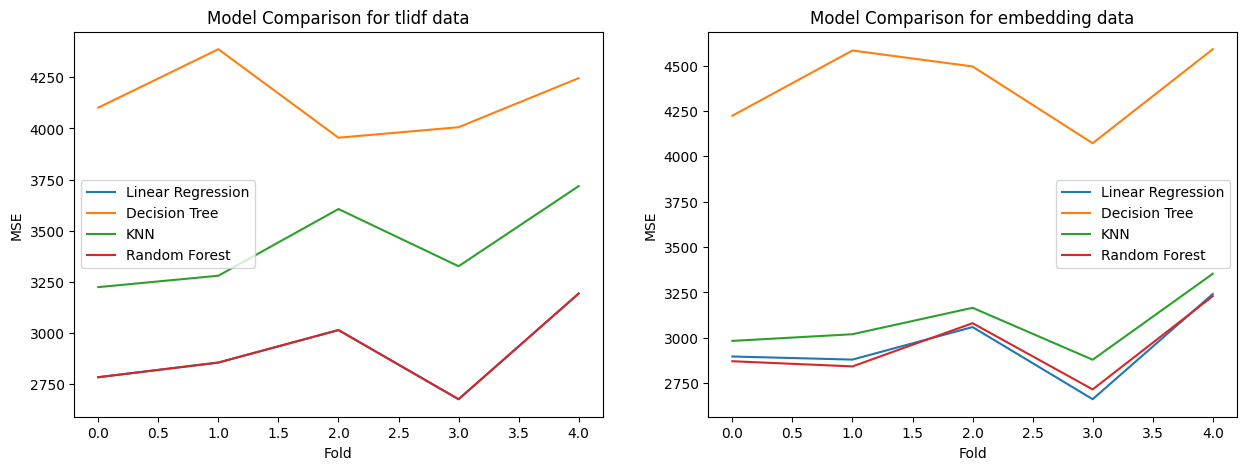

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(range(len(scores_lr_tfidf)), scores_lr_tfidf, label='Linear Regression')
axs[0].plot(range(len(scores_dt_tfidf)), scores_dt_tfidf, label='Decision Tree')
axs[0].plot(range(len(scores_knn_tfidf)), scores_knn_tfidf, label='KNN')
axs[0].plot(range(len(scores_rf_tfidf)), scores_rf_tfidf, label='Random Forest')

axs[1].plot(range(len(scores_lr_embedding)), scores_lr_embedding, label='Linear Regression')
axs[1].plot(range(len(scores_dt_embedding)), scores_dt_embedding, label='Decision Tree')
axs[1].plot(range(len(scores_knn_embedding)), scores_knn_embedding, label='KNN')
axs[1].plot(range(len(scores_rf_embedding)), scores_rf_embedding, label='Random Forest')

# set x and y axis labels
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('MSE')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MSE')

# set plot title
axs[0].set_title('Model Comparison for tlidf data')
axs[1].set_title('Model Comparison for embedding data')

# add legend
axs[0].legend()
axs[1].legend()

# show plot
plt.show()

By using K-fold-cross-validation, avoids overfitting on the model. Things like model works well with the test dataset but works poorly with the new data set.
It is also very obvious that using embedding data the model is much more accurate without any optimization.

Test it on the validation dataset.

In [13]:
print("Model score on validation dataset for tfidf lr {}, dt {}, knn {}, rf {} ".\
      format(score_valid_tfidf_lr,score_valid_tfidf_dt,score_valid_tfidf_knn,score_valid_tfidf_rf))
print("Model score on validation dataset for embedding lr {}, dt {}, knn {} rf {}".\
      format(score_valid_embedding_lr,score_valid_embedding_dt,score_valid_embedding_knn,score_valid_embedding_rf))

print("Model r2 score on validation dataset for tfidf lr {}, dt {}, knn {} rf {}".\
      format(r2_score_valid_tfidf_lr,r2_score_valid_tfidf_dt,r2_score_valid_tfidf_knn, r2_score_valid_tfidf_rf))
print("Model r2 score on validation dataset for embedding lr {}, dt {}, knn {} rf {}\
      ".format(r2_score_valid_embedding_lr,r2_score_valid_embedding_dt,r2_score_valid_embedding_knn, r2_score_valid_embedding_rf))

Model score on validation dataset for tfidf lr 3110.550460965372, dt 4029.933140714776, knn 3560.858613236284, rf 3073.9797991306446 
Model score on validation dataset for embedding lr 3059.3901198901435, dt 4155.671740427236, knn 3138.001135069907 rf 3009.2673369712247
Model r2 score on validation dataset for tfidf lr 0.18036236508448422, dt -0.3757612448977341, knn -0.07413000717572138 rf 0.19952198670958776
Model r2 score on validation dataset for embedding lr 0.2071023896614007, dt -0.46295126670124676, knn 0.16583189169534074 rf 0.2328700620261508      


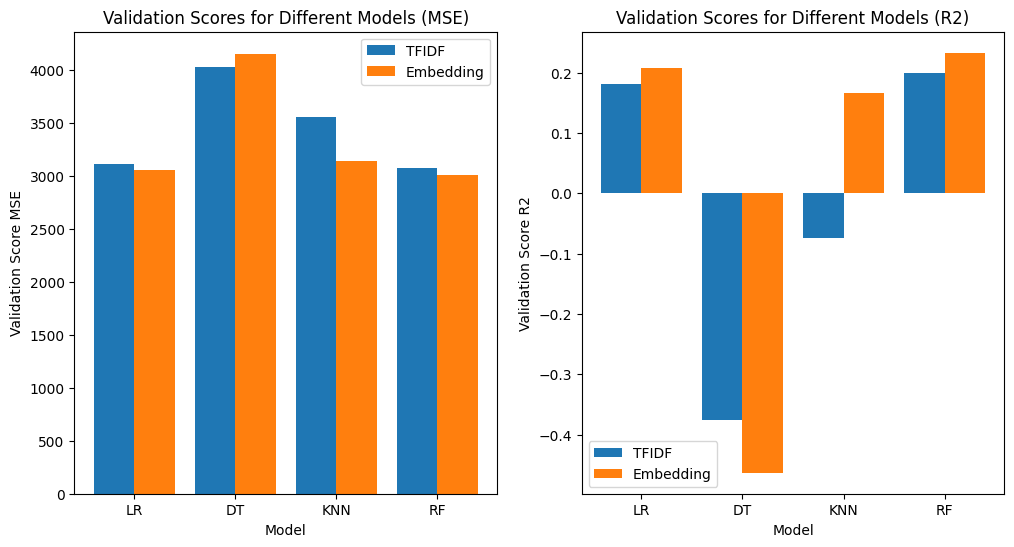

In [14]:
# Validation scores for tfidf model
scores_tfidf_mse = [score_valid_tfidf_lr, score_valid_tfidf_dt, score_valid_tfidf_knn,score_valid_tfidf_rf]

# Validation scores for embedding model
scores_embedding_mse = [score_valid_embedding_lr, score_valid_embedding_dt, score_valid_embedding_knn, score_valid_embedding_rf]

scores_tfidf_r2 = [r2_score_valid_tfidf_lr,r2_score_valid_tfidf_dt,r2_score_valid_tfidf_knn, r2_score_valid_tfidf_rf]
scores_embedding_r2 = [r2_score_valid_embedding_lr,r2_score_valid_embedding_dt,r2_score_valid_embedding_knn, r2_score_valid_embedding_rf]

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bars for tfidf and embedding models for MSE
axs[0].bar([0, 1, 2, 3], scores_tfidf_mse, width=0.4, label='TFIDF')
axs[0].bar([0.4, 1.4, 2.4, 3.4], scores_embedding_mse, width=0.4, label='Embedding')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Validation Score MSE')
axs[0].set_title('Validation Scores for Different Models (MSE)')
axs[0].set_xticks([0.2, 1.2, 2.2, 3.2])
axs[0].set_xticklabels(['LR', 'DT', 'KNN', 'RF'])
axs[0].legend()

# Plot the bars for tfidf and embedding models for R2 score
axs[1].bar([0, 1, 2, 3], scores_tfidf_r2, width=0.4, label='TFIDF')
axs[1].bar([0.4, 1.4, 2.4, 3.4], scores_embedding_r2, width=0.4, label='Embedding')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Validation Score R2')
axs[1].set_title('Validation Scores for Different Models (R2)')
axs[1].set_xticks([0.2, 1.2, 2.2, 3.2])
axs[1].set_xticklabels(['LR', 'DT', 'KNN', 'RF'])
axs[1].legend()

# Show the plot
plt.show()

Use Grid search to optimize all three models for the tfidf datasets

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

lr_params = {'fit_intercept': [True, False],'positive': [True, False],'copy_X': [True, False]}
dt_params = {'max_depth': range(1,5), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
knn_params = {'n_neighbors': range(1,20), 'weights': ['uniform','distance'],'p':[1,2]}
rf_params = {'n_estimators': [50, 100, 200, 500],'max_features': ['sqrt', 'log2'],'max_depth':  [5, 10, 15, None],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

random_lr_tfidf = RandomizedSearchCV(lr, lr_params, cv=5, n_iter=10, random_state=42)
random_dt_tfidf = RandomizedSearchCV(dt, dt_params, cv=5, n_iter=10, random_state=42)
random_knn_tfidf = RandomizedSearchCV(knn, knn_params, cv=5, n_iter=10, random_state=42)
random_rf_tfidf = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10, random_state=42)

random_lr_tfidf.fit(labeled_tfidf_train_data, labeled_train_data_y)
random_dt_tfidf.fit(labeled_tfidf_train_data, labeled_train_data_y)
random_knn_tfidf.fit(labeled_tfidf_train_data, labeled_train_data_y)
random_rf_tfidf.fit(labeled_tfidf_train_data, labeled_train_data_y)


c:\Users\xu741\miniconda3\envs\py39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42)

Use Grid  serach to optimze all three modesl for the embedding datasets

In [16]:

random_lr_embedding = RandomizedSearchCV(lr, lr_params, cv=5, n_iter=10)
random_dt_embedding = RandomizedSearchCV(dt, dt_params, cv=5, n_iter=10)
random_knn_embedding = RandomizedSearchCV(knn, knn_params, cv=5, n_iter=10)
random_rf_embedding = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=10)

random_lr_embedding.fit(labeled_embedding_train_data, labeled_train_data_y)
random_dt_embedding.fit(labeled_embedding_train_data, labeled_train_data_y)
random_knn_embedding.fit(labeled_embedding_train_data, labeled_train_data_y)
random_rf_embedding.fit(labeled_embedding_train_data, labeled_train_data_y)

c:\Users\xu741\miniconda3\envs\py39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]})

visualize on the validation score

In [18]:

random_lr_tfidf_predict, random_dt_tfidf_predict, random_knn_tfidf_predict, random_rf_tfidf_predict = \
    random_lr_tfidf.predict(X_valid_tfidf), random_dt_tfidf.predict(X_valid_tfidf), random_knn_tfidf.predict(X_valid_tfidf), random_rf_tfidf.predict(X_valid_tfidf)

score_valid_tfidf_lr_random = mean_squared_error(y_valid, random_lr_tfidf_predict ,squared=False)
score_valid_tfidf_dt_random = mean_squared_error(y_valid, random_dt_tfidf_predict,squared=False)
score_valid_tfidf_knn_random = mean_squared_error(y_valid, random_knn_tfidf_predict,squared=False)
score_valid_tfidf_rf_random = mean_squared_error(y_valid, random_rf_tfidf_predict,squared=False)

score_valid_tfidf_lr_random_r2 = r2_score(y_valid, random_lr_tfidf_predict)
score_valid_tfidf_dt_random_r2 = r2_score(y_valid, random_dt_tfidf_predict)
score_valid_tfidf_knn_random_r2 = r2_score(y_valid, random_knn_tfidf_predict)
score_valid_tfidf_rf_random_r2 = r2_score(y_valid, random_rf_tfidf_predict)

# Mean Squared Error for models with embeddings
random_lr_embedding_predict, random_dt_embedding_predict, random_knn_embedding_predict, random_rf_embedding_predict = \
    random_lr_embedding.predict(X_valid_embedding), random_dt_embedding.predict(X_valid_embedding), random_knn_embedding.predict(X_valid_embedding), random_rf_embedding.predict(X_valid_embedding)

score_valid_embedding_lr_random = mean_squared_error(y_valid, random_lr_embedding.predict(X_valid_embedding),squared=False)
score_valid_embedding_dt_random = mean_squared_error(y_valid, random_dt_embedding.predict(X_valid_embedding),squared=False)
score_valid_embedding_knn_random = mean_squared_error(y_valid, random_knn_embedding.predict(X_valid_embedding),squared=False)
score_valid_embedding_rf_random = mean_squared_error(y_valid, random_rf_embedding.predict(X_valid_embedding),squared=False)

score_valid_embedding_lr_random_r2 = r2_score(y_valid, random_lr_embedding_predict)
score_valid_embedding_dt_random_r2 = r2_score(y_valid, random_dt_embedding_predict)
score_valid_embedding_knn_random_r2 = r2_score(y_valid, random_knn_embedding_predict)
score_valid_embedding_rf_random_r2 = r2_score(y_valid, random_rf_embedding_predict)


In [21]:
print("TF-IDF Vectorizer Model")
print("Linear Regression: ")
print("MSE: ", score_valid_tfidf_lr_random)
print("R2 score: ", score_valid_tfidf_lr_random_r2)
print("Decision Tree: ")
print("MSE: ", score_valid_tfidf_dt_random)
print("R2 score: ", score_valid_tfidf_dt_random_r2)
print("K-Nearest Neighbors: ")
print("MSE: ", score_valid_tfidf_knn_random)
print("R2 score: ", score_valid_tfidf_knn_random_r2)
print("MSE: ", score_valid_tfidf_rf_random)
print("R2 score: ", score_valid_tfidf_rf_random_r2)


print("\nWord Embedding Model")
print("Linear Regression: ")
print("MSE: ", score_valid_embedding_lr_random)
print("R2 score: ", score_valid_embedding_lr_random_r2)
print("Decision Tree: ")
print("MSE: ", score_valid_embedding_dt_random)
print("R2 score: ", score_valid_embedding_dt_random_r2)
print("K-Nearest Neighbors: ")
print("MSE: ", score_valid_embedding_knn_random)
print("R2 score: ", score_valid_embedding_knn_random_r2)
print("MSE: ", score_valid_embedding_rf_random)
print("R2 score: ", score_valid_embedding_rf_random_r2)

TF-IDF Vectorizer Model
Linear Regression: 
MSE:  3107.3634414905405
R2 score:  0.18204107946519266
Decision Tree: 
MSE:  3188.029653164717
R2 score:  0.13902192161508664
K-Nearest Neighbors: 
MSE:  3169.8959236551236
R2 score:  0.14878866917211397
MSE:  3023.191699094412
R2 score:  0.22575437103456764

Word Embedding Model
Linear Regression: 
MSE:  3033.579035701311
R2 score:  0.2204247941780929
Decision Tree: 
MSE:  3202.413822971433
R2 score:  0.13123504687887255
K-Nearest Neighbors: 
MSE:  2986.311237025996
R2 score:  0.24452947258202773
MSE:  3001.772302810605
R2 score:  0.23668660887538528


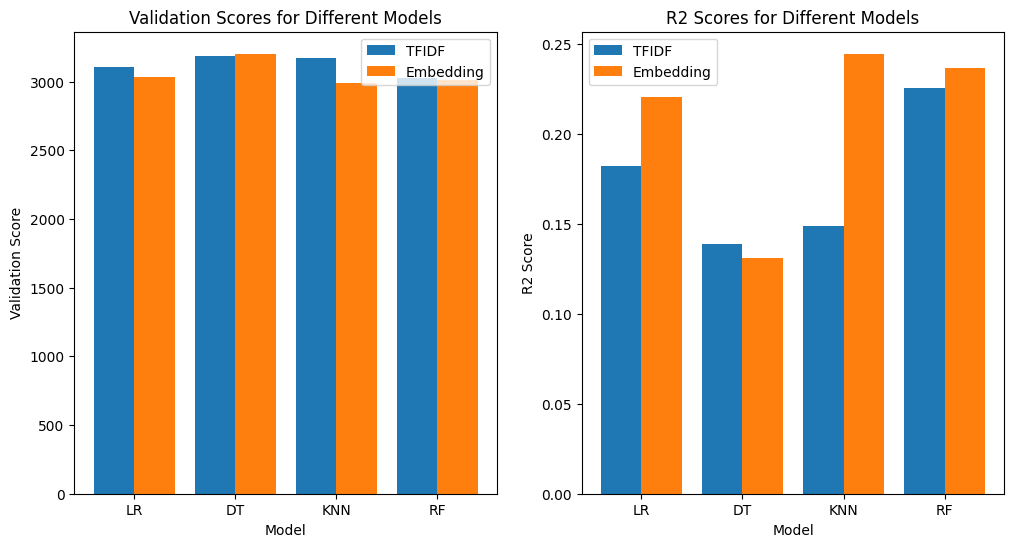

In [22]:
# Validation scores for tfidf model
scores_tfidf_random = [score_valid_tfidf_lr_random, score_valid_tfidf_dt_random, score_valid_tfidf_knn_random, score_valid_tfidf_rf_random]
# Validation scores for embedding model
scores_embedding_random = [score_valid_embedding_lr_random, score_valid_embedding_dt_random, score_valid_embedding_knn_random, score_valid_embedding_rf]

scores_tfidf_random_r2 = [score_valid_tfidf_lr_random_r2, score_valid_tfidf_dt_random_r2, score_valid_tfidf_knn_random_r2, score_valid_tfidf_rf_random_r2]
scores_embedding_random_r2 = [score_valid_embedding_lr_random_r2, score_valid_embedding_dt_random_r2, score_valid_embedding_knn_random_r2, score_valid_embedding_rf_random_r2]


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot the bars for tfidf and embedding models in the first subplot
ax1.bar([0, 1, 2, 3], scores_tfidf_random, width=0.4, label='TFIDF')
ax1.bar([0.4, 1.4, 2.4, 3.4], scores_embedding_random, width=0.4, label='Embedding')
ax1.set_xlabel('Model')
ax1.set_ylabel('Validation Score')
ax1.set_title('Validation Scores for Different Models')
ax1.set_xticks([0.2, 1.2, 2.2, 3.2])
ax1.set_xticklabels(['LR', 'DT', 'KNN', 'RF'])
ax1.legend()

# Plot the bars for tfidf and embedding models in the second subplot
ax2.bar([0, 1, 2, 3], scores_tfidf_random_r2, width=0.4, label='TFIDF')
ax2.bar([0.4, 1.4, 2.4, 3.4], scores_embedding_random_r2, width=0.4, label='Embedding')
ax2.set_xlabel('Model')
ax2.set_ylabel('R2 Score')
ax2.set_title('R2 Scores for Different Models')
ax2.set_xticks([0.2, 1.2, 2.2, 3.2])
ax2.set_xticklabels(['LR', 'DT', 'KNN', 'RF'])
ax2.legend()

# Show the plot
plt.show()

Show the eimprovement in percentage

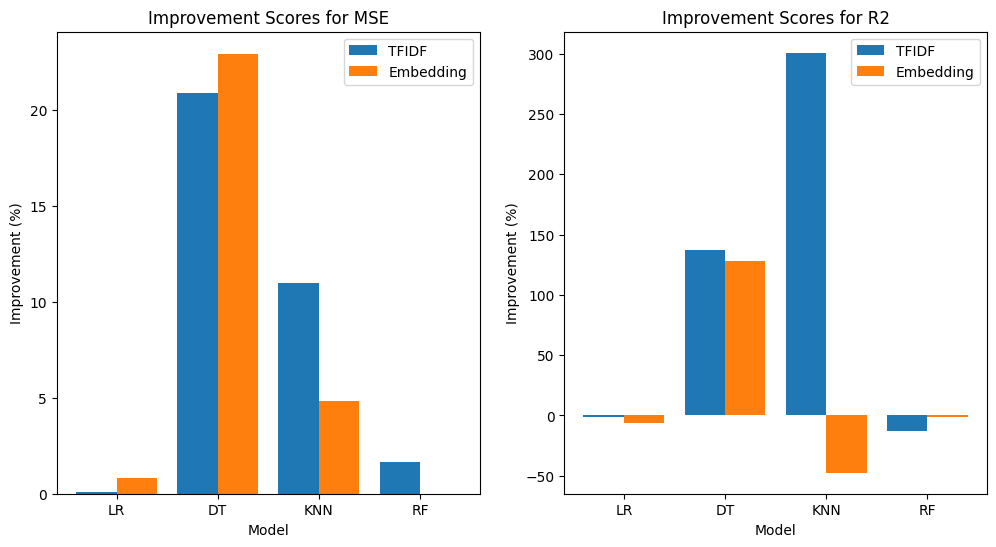

In [23]:
# Calculate the percentage improvement for each model
improvement_tfidf_mse = [((random_score - base_score) / base_score) * -100 for random_score, base_score in zip(scores_tfidf_random, scores_tfidf_mse)]
improvement_embedding_mse = [((random_score - base_score) / base_score) * -100 for random_score, base_score in zip(scores_embedding_random, scores_embedding_mse)]
improvement_tfidf_r2 = [((random_score - base_score) / base_score) * -100 for random_score, base_score in zip(scores_tfidf_random_r2, scores_tfidf_r2)]
improvement_embedding_r2 = [((random_score - base_score) / base_score) * -100 for random_score, base_score in zip(scores_embedding_random_r2, scores_embedding_r2)]

# Create a bar chart to visualize the improvement scores for MSE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].bar([0, 1, 2, 3], improvement_tfidf_mse, width=0.4, label='TFIDF')
ax[0].bar([0.4, 1.4, 2.4, 3.4], improvement_embedding_mse, width=0.4, label='Embedding')

# Add labels and title for the MSE plot
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Improvement (%)')
ax[0].set_title('Improvement Scores for MSE')
ax[0].set_xticks([0.2, 1.2, 2.2, 3.2])
ax[0].set_xticklabels(['LR', 'DT', 'KNN', 'RF'])
ax[0].legend()

# Create a bar chart to visualize the improvement scores for R2
ax[1].bar([0, 1, 2, 3], improvement_tfidf_r2, width=0.4, label='TFIDF')
ax[1].bar([0.4, 1.4, 2.4, 3.4], improvement_embedding_r2, width=0.4, label='Embedding')

# Add labels and title for the R2 plot
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Improvement (%)')
ax[1].set_title('Improvement Scores for R2')
ax[1].set_xticks([0.2, 1.2, 2.2, 3.2])
ax[1].set_xticklabels(['LR', 'DT', 'KNN', 'RF'])
ax[1].legend()

# Show the plot
plt.show()

Use linear regression with sgd to train with the data

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

# Define the model
sgd = SGDRegressor()

# Train the model
sgd.fit(X_train_tfidf, y_train_tfidf)

# Evaluate on the validation set
score_valid_tfidf_sgd = mean_squared_error(y_valid, sgd.predict(X_valid_tfidf),squared=False)
score_valid_tfidf_sgd_r2 = r2_score(y_valid, sgd.predict(X_valid_tfidf))

# Evaluate using k-fold cross validation
scores_sgd = cross_val_score(sgd, X_train_tfidf, y_train_tfidf, cv=kf, scoring='neg_mean_squared_error')
avg_score_tfidf_sgd = -scores_sgd.mean()

In [25]:
# Train the model using embedding
sgd.fit(X_train_embedding, y_train_embedding)

# Evaluate on the validation set
score_valid_embedding_sgd = mean_squared_error(y_valid, sgd.predict(X_valid_embedding),squared=False)
score_valid_embedding_sgd_r2 = r2_score(y_valid, sgd.predict(X_valid_embedding))

# Evaluate using k-fold cross validation
scores_sgd = cross_val_score(sgd, X_train_embedding, y_train_embedding, cv=kf, scoring='neg_mean_squared_error')
avg_score_embedding_sgd = -scores_sgd.mean()

Get validation score for the model

In [26]:
print("sgd valid accuracy for tfidf MSE is {}".format(score_valid_tfidf_sgd))
print("sgd valid accuracy R2 tfidf is {}".format(score_valid_tfidf_sgd_r2))
print("sgd valid accuracy MSE embedding is {}".format(score_valid_embedding_sgd))
print("sgd valid accuracy R2 is embedding {}".format(score_valid_embedding_sgd_r2))

sgd valid accuracy for tfidf MSE is 3054.2343831585927
sgd valid accuracy R2 tfidf is 0.20977254718574156
sgd valid accuracy MSE embedding is 2999.2839213682787
sgd valid accuracy R2 is embedding 0.23795161328340586


Optimize the model with random search

In [31]:
from scipy.stats import loguniform
param_dist_sgd = {
    'loss': ['squared_epsilon_insensitive', 'huber', 'squared_error', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': loguniform(1e-5, 100),
    'l1_ratio': [0, 0.15, 0.5, 0.85, 1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': loguniform(1e-5, 10),
    'power_t': loguniform(1e-5, 1),
    'max_iter': [1000, 5000, 10000],
    'tol': loguniform(1e-6, 1e-3),
    'epsilon': loguniform(1e-5, 1),
    'early_stopping': [False, True],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [5, 10, 20],
    'shuffle': [False, True],
    'random_state': [42]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=sgd,
    param_distributions=param_dist_sgd,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_tfidf, y_train_tfidf)



c:\Users\xu741\miniconda3\envs\py39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E3083FBA00>,
                                        'early_stopping': [False, True],
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E301B47790>,
                                        'eta0': <scipy.stats._distn_infrastructure.rv_continuous_...
                                        'n_iter_no_change': [5, 10, 20],
                                        'penalty': ['l2', 'l1', 'elasticnet'],
                                        'power_t': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E301B29370>,
                                        'random_state': [42],
                                        'shuffle': [False, True],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E301B331C0>,
                                        'validation_fraction': [0.1, 0.2, 0.3]},
                   scoring='neg_mean_squared_error')

In [32]:
# Evaluate on the validation set
score_valid_tfidf_sgd_r = mean_squared_error(y_valid, random_search.predict(X_valid_tfidf),squared=False)
score_valid_tfidf_sgd_r2_r = r2_score(y_valid, random_search.predict(X_valid_tfidf))
# Evaluate on the validation set
score_valid_embedding_sgd_e = mean_squared_error(y_valid, sgd.predict(X_valid_embedding),squared=False)
score_valid_embedding_sgd_r2_e = r2_score(y_valid, sgd.predict(X_valid_embedding))
print("sgd valid accuracy for tfidf MSE is {}".format(score_valid_tfidf_sgd_r))
print("sgd valid accuracy R2 tfidf is {}".format(score_valid_tfidf_sgd_r2_r))
print("sgd valid accuracy for embedding MSE is {}".format(score_valid_embedding_sgd_e))
print("sgd valid accuracy R2 embedding is {}".format(score_valid_embedding_sgd_r2_e))

sgd valid accuracy for tfidf MSE is 3082.1687489983865
sgd valid accuracy R2 tfidf is 0.1952514280410903
sgd valid accuracy for embedding MSE is 2999.2839213682787
sgd valid accuracy R2 embedding is 0.23795161328340586
